<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/cfproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Harmonic functions for movie animation
* Press the **Open in Colab** button above in
  order to run the code in this notebook.
  You will be prompted to first get a copy
  of this notebook to your personal google drive.
* A first draft of a Google Coab notebook for
  the Complex functions course projects
* This is just a proof of concept and ideas that can
  be used for helping the students with this project
* Some of the stuff is meant for the instructors and may
  not be passed to students
* The intention is to start a discussion on what we need
  to present to the students.
* The **cfclon** project (suggested short name) is in the
  context of an an undergraduate course on comple functions,
  and its purpose is to demonstrate how theoretical topic
  such as "Harmonic Functions" is practically used in the
  graphical movies industery (such as **Pixar**)
* Recommended papers:
  1. https://www.ams.org/publicoutreach/feature-column/fcarc-harmonic
  2. https://graphics.pixar.com/library/HarmonicCoordinates/paper.pdf
  3. https://www.cs.jhu.edu/~misha/Fall07/Papers/Joshi07.pdf
  4. https://www.cs.huji.ac.il/~danix/mvclone/files/mvc-final-opt.pdf


## Google Colab Notebook
* If you are new to **Google Colab (Jupyter notebook)**,
  take this 9 minutes course:  
  [Google Colab Tutorial for Beginners](https://www.youtube.com/watch?v=iMlMfrXJYSg)

* To avoid variable namespace corruption (after a long
  session usage), from time to time restart your
  notebook from the **Runtime menu button**:
  *Disconnect and delete runtime*  
  <IMG src="https://samyzaf.com/cfproj/colab1.jpg" width=500 align="center"/>

* After restart, make sure to run all code cells
  one by one according to their order.

## Installation
* Run the following cell to install the **cfclon** package.
* The second command imports **cfclon** namespace to here.

In [ ]:
%pip install https://samyzaf.com/cfclon.zip
from cfclon import *

  Using cached https://samyzaf.com/cfclon.zip (9.1 kB)
  Preparing metadata (setup.py) ... done


* The following command mounts your Google drive
  so you can read and save files on your Google drive.

* To activate it, remove the comment sign ('#') and run
  the next cell.

In [ ]:
#mount_google_drive()

## Overview
* Animation characters such as
  **Pixar Animation Studio**
  [Ratatouille](https://www.imdb.com/title/tt0382932/)
  or
  [Remy](https://www.youtube.com/watch?v=3YG4h5GbTqU)
  are modeled by a 3D geometric mesh that usually
  consists of 5000 to 9000 points (usually
  a triangular mesh model, but also rectangular grid
  models are common).
  See the figures below.

* This is a very heavy and complex data structure which is
  very hard to manipulate.
  Animating a 9000 points triangular mesh is
  a highly challenging mission.
  At every move, each point and triangle must be addressed
  individually so that the overall character move
  does not generate deformities and unsynchronizations.

* The common method for animating a 9000 point mesh
  character is by enclosing it within a simpler control figure called **cage** (which usually consists of 100 or 150 control points) that is easier to manipulate and maneuver (for example by a real person or a robot
  which wear a special suit that contains the cage points
  that records the control points movements).

* To move the character we only need to reposition the 100
  (roughly) control points of the cage to the desired
  pose and deploy an algorithm by which we move
  the 9000 mesh points of our character according to some
  interpolation algorithm (**"cloning"**).

* This algorithm must be computationaly efficient but must
  not cause any unpleasant distortions to our character.

* The action of deforming our character from the old cage to
  the new cage is called **image cloning**.

* To be continued ...
<IMG src="https://samyzaf.com/cfproj/group2.jpg" width=700 align="center"/>



* Due to the high complexity of the 3D case, this project
  is restricted to the 2D case.
  <figure>
  <IMG src="https://samyzaf.com/cfproj/mean_figs2.png" width=500 align="center" figcaption="test aaa"/>
  <figcaption>
  Cloning a cat character using mean value coordinates
  </figcaption>
  </figure>

* The follwoing YouTube video show how you can
  actually create an animation of the cat
  by animating the cage and clone the initial image
  after each move.

* The full YouTube address of this video is  
  https://www.youtube.com/watch?v=OnGSuGOJzg0


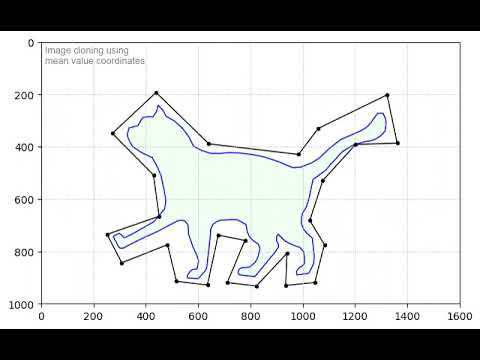

In [ ]:
YouTubeVideo("OnGSuGOJzg0", width=640, height=397)

* The two main methods for acomplishing this scheme
  are
  1. *Gradient domain techniques* (such as
  the *Poisson cloning* method)

  2. *Coordinate-based techniques* which use the cage
     for defining a coordinate that is used to describe
     our animation characers as a function of
     the cage vertices.
     When the cage moves, our charater is recomputed
     from the new cage vertices.

* The first method is very heavy computationally and
  thus less and less popular, while the second method
  gained more momentum as it is much faster and
  generates more
  pleasing deformations to the character.

* We will present the three main techniques of the second
  method, but most of the effort will fall on
  the third technique which deploys Harmonic functions:
  1. Barycentric coordinates
  2. Mean value coordinates
  3. Harmonic coordinates

* The following YouTube video contains more details about
  this method in the 3D case
  * https://www.youtube.com/watch?v=egf4m6zVHUI
* You can also play it here if you entered the
  Google Colab mode.

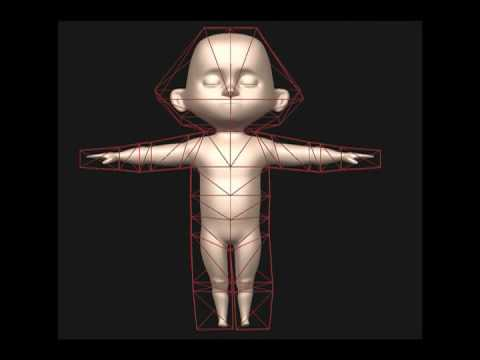

In [ ]:
YouTubeVideo("egf4m6zVHUI", width=720, height=480)

* Future plan: to copy relvant parts from this movie and add our stuff to a new movie of our own (should include more
relevant info for the project).

## Barycentric Coordinates
* Given a triangular cage  
$
C = \{(x_1,y_1), (x_2,y_2), (x_2,y_3)\}
$

<IMG src="https://samyzaf.com/cfproj/cage1.jpg" width=400 align="center"/>

* The barycentric coordinates method for this cage
  is a linear transformation
$$
\beta(x,y) = (d_1,d_2,d_3)
$$
  which assigns to each point
  $(x,y)$ in the 2-dimensional plane $\mathbb{R}^2$
  three coordinates $(d_1,d_2,d_3)$.

* Each of the components $d_1$, $d_2$, $d_3$ is obtained
  by a corresponding linear function
  $\beta_1(x,y)$, $\beta_2(x,y)$, $\beta_3(x,y)$  
$
d_1 = \beta_1(x,y) = a_1 x + b_1 y + c_1
\\
d_2 = \beta_2(x,y) = a_2 x + b_2 y + c_2
\\
d_3 = \beta_3(x,y) = a_3 x + b_3 y + c_3
$  
which is equivalent to  
$
\beta(x, y)
=
\begin{bmatrix}
d_1 \\ d_2 \\ d_3
\end{bmatrix}
=
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ y_1 \\ 1
\end{bmatrix}
$

* The main two requirements from this map are
  * Every point $(x,y)$ in the plane is the linear
     combination of the cage vertices where
     the barycentric coordinates are the coefficients
$$
(x,y) = d_1 \cdot (x_1,y_1) + d_2\cdot (x_2,y_2) + d_3\cdot (x_3,y_3)
$$

  * The three vertices of the cage must satisfy
$$
\beta(x_1,y_1) = (1,0,0)
\\
\beta(x_2,y_2) = (0,1,0)
\\
\beta(x_3,y_3) = (0,0,1)
$$



### Exercise suggestion
Assuming that our cage is a non-degenerate triangle
* Prove that there is a unique solution for $\beta$
* Find a solution for $\beta$ in terms of $x_1$, $y_1$.

## Solution
We need to solve three 3x3 linear systems  
$
\begin{align}
\beta(x_1, y_1)
=
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ y_1 \\ 1
\end{bmatrix}
=
\begin{bmatrix}
1 \\ 0 \\ 0
\end{bmatrix}
\\[2ex]
\beta(x_2, y_2)
=
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
\begin{bmatrix}
x_2 \\ y_2 \\ 1
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 1 \\ 0
\end{bmatrix}
\\[2ex]
\beta(x_3, y_3)
=
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
\begin{bmatrix}
x_3 \\ y_3 \\ 1
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 1
\end{bmatrix}
\end{align}
$

For programmers it is also useful to note that the above
three systems are equivalent to the following matrix
equation

$
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
\begin{bmatrix}
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3 \\
1 & 1 & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$

Thus  
$
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
=
\begin{bmatrix}
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3 \\
1 & 1 & 1 \\
\end{bmatrix}
^{-1}
$

Thus  
$
\beta(x,y)
=
\begin{bmatrix}
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3 \\
1 & 1 & 1 \\
\end{bmatrix}
^{-1}
\begin{bmatrix}
x \\ y \\ 1
\end{bmatrix}
$

* Experienced **Python/Numpy** programmers can turn
  this into a 4 lines method which resolves this problem.

* Indeed, this is the method we use for
  solving the following examples

```python
    def get_bary_coords_map(cage):
        A = [point + (1,) for point in cage]
        M = linalg.inv(A).transpose()
        map = lambda x,y: np.dot(M,[x,y,1])
        return map
```

* This method returns a function object which is
  the barycentric transformation for our cage.
* See the examples below.

## Python commands
* Some experiments with some ideas for studets
  to play with

* The Python code can be further simplifies if desired
  (so students can test more ideas by themselves)

* Some of the methods we use:
  * **get_bary_coords_map(cage1)** - obtain the barycentric
    coordinates transformation for a given **cage** (only
    triangular cage is supported of course)
  * **clone(coords, cage)** - Apply the batycentric coords
    on a new cage to obtain the new point in a new cage (the
    coords were computed in a previous cage)
  * **draw_cage** - draw the cage on canvas
  * **draw_poly** - draw a polygon from its coordinate list
  * **draw_oval(x0,y0,a,b)** - draw an ellipse centered
    at `(x0,y0)` and axis `a`, `b`.
  * **draw_curve(coords_list)** - draw an arbitrary
    curve from its coordinate list (the diffrence from
    **draw_poly** is that vertices are not drawn)

### Example
* In our first example we compute the barycentric
  coordinates of a single point `p=(x1,y1)=(6,4)`
  inside the triangle `[(3,1), (5,6), (9,2)]`

* Then we show how to visualize the cage and the point
  on a
  [matplotlib](https://matplotlib.org)
  canvas.

In [ ]:
cage1 = [(3,1), (5,6), (9,2)]
bary_coords = get_bary_coords_map(cage1)
p = x1,y1 = 6,4
coords = bary_coords(x1, y1)
print(f"The barycentric coordinates of {(x1,y1)} = {coords}")

The barycentric coordinates of (6, 4) = (0.14285714285714302, 0.5357142857142856, 0.3214285714285712)


* To validate that these are indeed the correct
  Barycentrict coordinates of `p` we need to
  verify that the dot product
  of the vector
  `(0.14285714, 0.53571429, 0.32142857)`
  with the cage vertices yield the point `p`  
$
\qquad
0.14285714\cdot (3,1)
+ 0.53571429\cdot (11,10)
+ 0.32142857\cdot (9,2)
=
(5.999999999999997, 3.999999999999999) \approx p
$  
This is of course a good enough approximation.

* This calculation can be done more simply
  with the **clone(coords, cage)**
  command.

In [ ]:
clone(coords, cage1)

(5.999999999999997, 3.999999999999999)

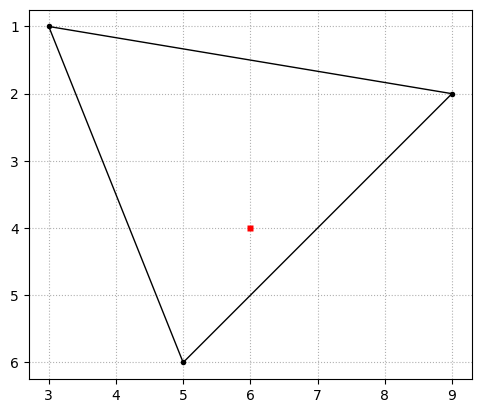

In [ ]:
draw_cage(cage1)
draw_point(x1, y1, color="red")
show_plot()

* Next, we modify our cage by replacing the vertex
  `(5,6)` with `(11,10)`.
  The new cage is called **cage2**.
  To find out what happens to our point `p`
  under this transition, we apply the
  command **clone(coords, cage2)**

Cloned point = (9.214285714285712, 6.1428571428571415)


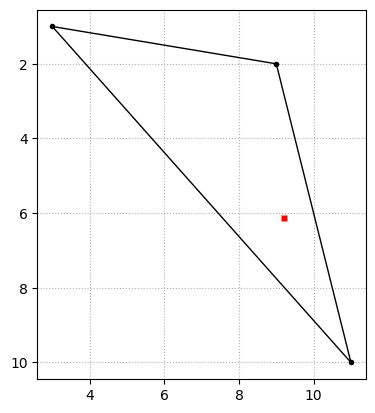

In [ ]:
cage2 = [(3,1), (11,10), (9,2)]
draw_cage(cage2)
x2,y2 = clone(coords, cage2)
print(f"Cloned point = ({x2}, {y2})")
draw_point(x2, y2, color="red")
show_plot()

* In the next example we draw a circle inside `cage1`
  and then see what happens to it when we move to `cage2`.

* We use the command **draw_oval(x0, y0, a, b)**
  which draw an ellipse centered at `(x0,y0)` with
  radii `a`, `b`.

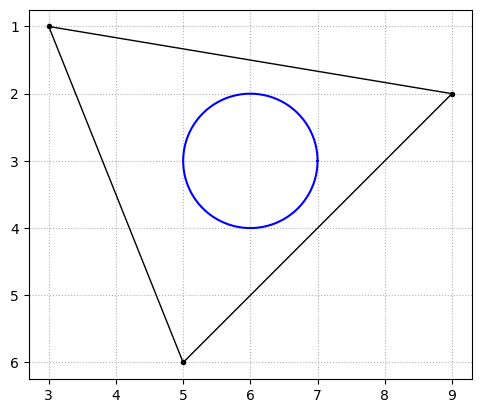

In [ ]:
cage1 = [(3,1), (5,6) ,(9,2)]
draw_cage(cage1)
circle = draw_oval(6,3,1,1)
show_plot()

In [ ]:
bary_coords = get_bary_coords_map(cage1)
coords_list = bary_coords(circle)

* Now we moved the top vertex (5,6)
  to a new location (11,10).
* Then we calculate the effect of this cage change
  on our circle.

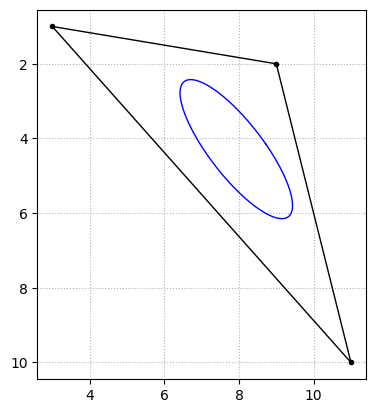

In [ ]:
cage2 = [(3,1), (11,10), (9,2)]
draw_cage(cage2)
cloned_set = clone(coords_list, cage2)
draw_curve(cloned_set)
show_plot()

* In the next example we draw a man figure inside **cage1**
  and then see how it is cloned into **cage2**.

* This time our
  [man figure](https://samyzaf.com/cfproj/man1.svg)
  features a polygon
  with 28 points, therefore we use a
  [Scalable Vector Graphics \(SVG\)](https://en.wikipedia.org/wiki/SVG) file for de

* [SVG](https://en.wikipedia.org/wiki/SVG)
  is now the standard image format for defining two-dimensional graphics, which later will also enable
  us to create and edit polygons for our
  project by using software tool such as
  [Inkscape](https://inkscape.org)

* Please install [inkscape](https://inkscape.org)
  and use it for editting the following example
  in this notebook.

* You can download the cat and man svg files
  from  
  https://samyzaf.com/cfproj/files.zip

* Inkscape tutorials
  * [Inkscape Tutorials Playlist](https://www.youtube.com/watch?v=8f011wdiW7g&list=PLqazFFzUAPc5lOQwDoZ4Dw2YSXtO7lWNv)
  * [Inkscape Explained: Editing Nodes, Paths & The Bezier Pen](https://www.youtube.com/watch?v=dVjJfx2oc5w)
  * [InkScape - Tutorial for Beginners in 13 MINUTES! ](https://www.youtube.com/watch?v=rFYQW2DCM2I)

In [ ]:
url = "https://samyzaf.com/cfproj/man1.svg"
man = read_polygon(url, tag="man")
cage1 = read_polygon(url, tag="cage")
print(cage1)

[(314.0, 1143.0), (631.0, 218.0), (1770.0, 1143.0)]


* To get an impression on how the man character polygon
  looks like, lets print it

In [ ]:
print(man)

[(828.0, 497.0), (834.0, 555.0), (808.0, 577.0), (808.0, 617.0), (908.0, 617.0), (1028.0, 657.0), (1028.0, 797.0), (988.0, 797.0), (988.0, 697.0), (868.0, 677.0), (857.0, 828.0), (988.0, 1097.0), (928.0, 1097.0), (788.0, 886.0), (668.0, 1097.0), (608.0, 1097.0), (719.0, 827.0), (708.0, 677.0), (588.0, 697.0), (588.0, 797.0), (548.0, 797.0), (548.0, 657.0), (668.0, 617.0), (768.0, 617.0), (768.0, 577.0), (740.0, 556.0), (745.0, 496.0), (787.0, 479.0), (828.0, 497.0)]


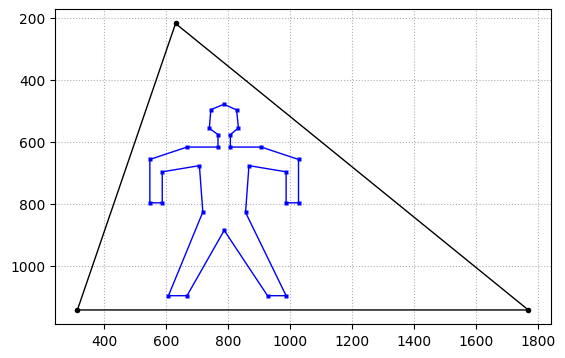

In [ ]:
draw_cage(cage1)
draw_poly(man)
show_plot()


* Now we compute the Barycentric coordinates of
  our **man figure** with respect to
  our initial cage **cage1**.

* Notice that we first need to generate
  the Barycentric coordinates transformation,
  which we can apply on any set of coordinates.

In [ ]:
bary_coords_map = get_bary_coords_map(cage1)
coords_list = bary_coords_map(man)

* You may use inkscape tool for editting our polygon
  (which you can download to your pc)
  and generate more cage examples

* But you can also modify a point or two of **cage1**
  and obtain a new cage to play with as we did
  in the next example.

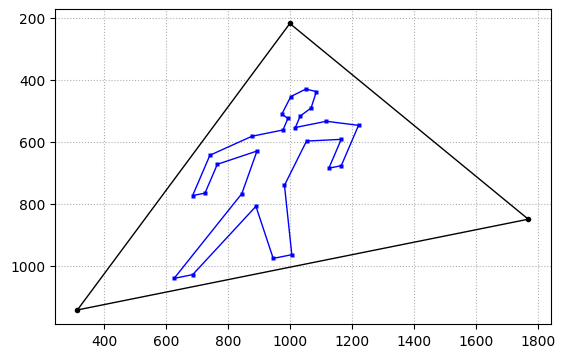

In [ ]:
cage2 = [(314,1143), (1000,218), (1770,850)]
draw_cage(cage2)
cloned_points = clone(coords_list, cage2)
draw_poly(cloned_points)
show_plot()


* Please install and use the
  [InkScape](https://inkscape.org) application
  to edit the cage and test different types of cages.

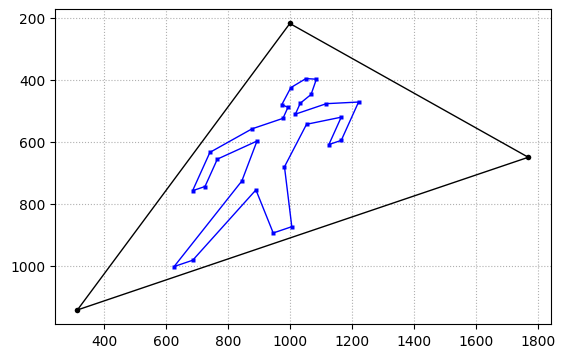

In [ ]:
cage3 = [(314,1143), (1000,218), (1770,650)]
draw_cage(cage3)
cloned_points = clone(coords_list, cage3)
draw_poly(cloned_points);
show_plot()

## Mean Value Coordinates
* Barycentric coordinates exist **only** for
  triangular cages! This is of course a serious
  limitation, since even 2D animation characters require
  cages that are more complex (as we see in the
  following figure).

<IMG src="https://samyzaf.com/cfproj/cat1a.jpg" width=400 align="center"/>

* Mean value coordinates are a generalization of
  Barycentric coordinates to polygons
  of any order $m$ (number of vertices)
  as seen in the following figure.

<IMG src="https://samyzaf.com/cfproj/mean1.jpg" width=400 align="center"/>

* The formal definition of mean value is roughly as follows.
* Let $\mathbf{p}$ a point inside our cage (see figure),
  and let $\alpha_0$, $\alpha_1$, $\ldots$, $\alpha_{m-1}$
  the angles generated by joining the point $\mathbf{p}$
  to the cage vertices.
* Let $\beta_i$ be the Barycentric coordinates map
  corresponding to the triangle
  $\Delta(\mathbf{p},\mathbf{p}_i,\mathbf{p}_{i+1})$

* For each $i$, the circle $\text{arc}(\alpha_i)$
  correponding to angle $\alpha_i$ is included in the
  triangle
  $\Delta(\mathbf{p}, \mathbf{p}_i,\mathbf{p}_{i+1})$,
  and therefore every point $\mathbf{q}$ on this arc
  has Barycentric coordinates
  $\beta_i(\mathbf{q})$.

* If we take the sum of all these value on
  $\mathrm{arc}(\alpha_i)$,
  we get the definition of the mean value coordinates  
  $
  \qquad
  \lambda_i(\mathbb{p})
  =
  \int_{q\in\text{arc}(\alpha_i)} \beta_i(q)
  $

* We will not delve into the details of this special
  contour integral since it is not practical for
  computing the mean value coordinates.

* Instead, we use an equivalent simpler formula
  (see paper 4 above) for doing this.
  You can find more information on this integral in
  the 4 papers mentioned above if you like.

* The simplified formula from paper 4 (see above) is  
$
\qquad
\lambda_i(\mathbb{p})
=
\frac{w_i}{\sum_{j=0}^{m-1} w_j},
\qquad
w_i = \frac{\tan(\alpha_{i-1}/2) + \tan(\alpha_i/2)}{\|p_i - p\|}
$

### Example
* This time we are using a **Cat Character**, represented
  by a **152 vertices** polygon.

* So instead of displaying the full 152 coordinates
  in a cell we simply read them from
  a file which we store on our website:

In [ ]:
url = "https://samyzaf.com/cfproj/cat1.svg"
cat = read_polygon(url, tag="cat")
cage1 = read_polygon(url, tag="cage1")
print(cat)
print(f"Number of vertices = {len(cat)}")

[(360.0, 411.0), (355.0, 388.0), (381.0, 398.0), (399.0, 413.0), (438.0, 417.0), (477.0, 429.0), (511.0, 448.0), (542.0, 476.0), (579.0, 480.0), (619.0, 480.0), (654.0, 473.0), (690.0, 464.0), (737.0, 458.0), (797.0, 456.0), (844.0, 458.0), (903.0, 467.0), (951.0, 480.0), (980.0, 474.0), (1017.0, 452.0), (1040.0, 428.0), (1060.0, 381.0), (1068.0, 332.0), (1066.0, 296.0), (1057.0, 265.0), (1045.0, 244.0), (1032.0, 230.0), (1017.0, 217.0), (1006.0, 208.0), (1006.0, 193.0), (1021.0, 183.0), (1036.0, 182.0), (1055.0, 186.0), (1075.0, 206.0), (1092.0, 228.0), (1109.0, 255.0), (1117.0, 289.0), (1123.0, 338.0), (1116.0, 388.0), (1106.0, 428.0), (1092.0, 451.0), (1077.0, 480.0), (1048.0, 505.0), (1027.0, 521.0), (1023.0, 551.0), (1021.0, 569.0), (1017.0, 597.0), (1008.0, 631.0), (992.0, 658.0), (987.0, 679.0), (987.0, 700.0), (994.0, 721.0), (1007.0, 737.0), (1026.0, 755.0), (1025.0, 787.0), (1025.0, 826.0), (1020.0, 857.0), (996.0, 894.0), (944.0, 896.0), (942.0, 883.0), (950.0, 874.0), (959.

* The initial cage (cage1) consists of 27 vertices.

* You may download all SVG files from  
  https://samyzaf.com/cfproj/files.zip

In [ ]:
print(cage1)
print(f"Number of vertices = {len(cage1)}")

[(455.0, 748.0), (396.0, 600.0), (259.0, 559.0), (327.0, 347.0), (605.0, 442.0), (984.0, 430.0), (1030.0, 328.0), (959.0, 182.0), (1078.0, 126.0), (1201.0, 368.0), (1072.0, 529.0), (1027.0, 682.0), (1072.0, 779.0), (1021.0, 931.0), (905.0, 931.0), (935.0, 806.0), (858.0, 930.0), (737.0, 930.0), (781.0, 761.0), (683.0, 739.0), (673.0, 931.0), (557.0, 931.0), (564.0, 786.0), (510.0, 935.0), (397.0, 935.0)]
Number of vertices = 25


* Of course, more important is that we can actually draw
  these polygons

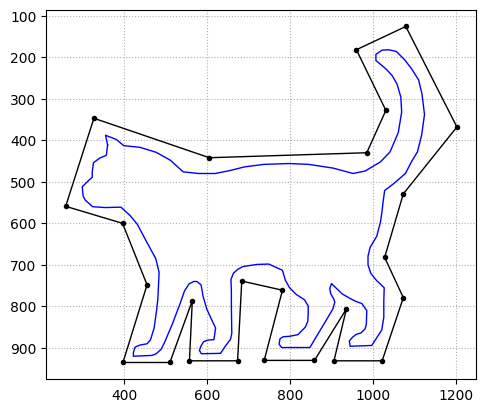

In [ ]:
draw_curve(cat)
draw_cage(cage1)
show_plot()

* The following procedure **get_mean_value_coords_map**
  builds and returns the mean value coordinates map
  for a given cage.

* In other words, it generates for us the method we
  need to apply on a point $(x,y)$ for computing
  its mean value coordinates!

In [ ]:
mean_coords = get_mean_value_coords_map(cage1)

* For example, lets see what if we run it on the
  point $\mathbb{p} = (800,600)$ which is obviously inside
  our cage.
* It should return 27 coordinates! Since our cage
  has 27 vertices!

In [ ]:
coords = mean_coords(800,600)
print(coords)

[0.040393917976884575, 0.02604631866629192, 0.019822438089223383, 0.024673532188101994, 0.21553175756963125, 0.1888645511624921, -0.02822407689043057, -0.008432484560605878, 0.027351200715882613, 0.037272299296823345, 0.06859696872528433, 0.07682131030916779, 0.04263843796486328, 0.037432847913430996, 0.0005447332778041454, 0.012044607378945743, 0.050247110483735986, 0.019018881446568717, 0.07043991810861416, 0.03128176613621314, -0.004143446933887606, 0.02845252426596978, 0.0058536415558850825, -0.0012816017219222098, 0.01875284687503196]


* To validate our **mean_coords** procedure for this
  point we need to check that the dot product
  of the coords vector and the cage polygon
  yield the point $(800,600)$  
$
(800,600)
=
\sum_{i=0}^{26} \mathrm{coords}[i] \cdot \mathrm{cage1}[i]
$

* Note that the cage1 vector is viewed as a vector of
  27 tuples $(x_i,y_i)$, $i=0,1,2,\ldots,26$.

* Within our Python code, this is acomplished
  by the **clone** procedure

In [ ]:
x,y = clone(coords, cage1)
print(x,y)

799.9999999999999 599.9999999999999


* This looks pretty good for our project.

* To apply this map on all the cat points, we
  apply the **mean_coords** function on
  the list **cat** (polygon points).

* The **mean_coords** procedure is applied on all
  points $(x,y)$ in the cat polygon, and
  we get a list of all 152 mean value coordinates
  corresponding to the 152 points of the cat polygon.

In [ ]:
coords_list = mean_coords(cat)

* If you want to see how this list looks like
  run the following code (not recommended, it's too long!)

In [ ]:
for coords in coords_list:
  print(coords)

* Next we want to modify our cage and see what
  happens to our cat figure as a result of it.

* We have built three additional examples of cage (with
  a simple drawing application) and stored them
  in our website for you to use.

* For that purpose we need to clone all the 152 cat point
  with respect to the new cage.
  
* We built a Python procdure **apply_cage** which
  does this smoothly (if you're a Python programmer you're
  welcome to peak at the package
  [code](https://samyzaf.com/cfclon.tar.gz).

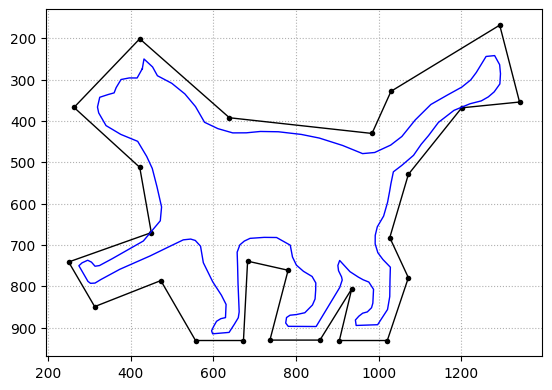

In [ ]:
url = "https://samyzaf.com/cfproj/cat2.svg"
cage2 = read_polygon(url, tag="cage2")
apply_cage(cage2, coords_list)
show_plot()

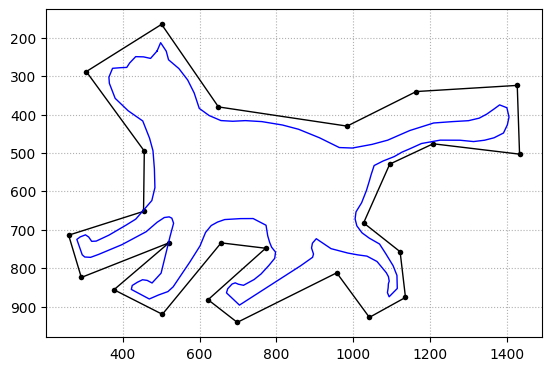

In [ ]:
url = "https://samyzaf.com/cfproj/cat3.svg"
cage3 = read_polygon(url, tag="cage3")
apply_cage(cage3, coords_list)
show_plot()

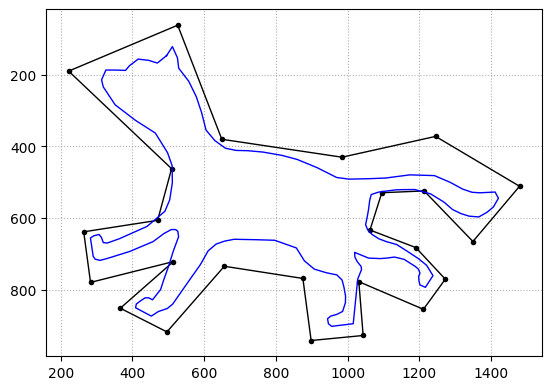

In [ ]:
url = "https://samyzaf.com/cfproj/cat4.svg"
cage4 = read_polygon(url, tag="cage4")
apply_cage(cage4, coords_list)
show_plot()

* Here are the last 4 figures grouped together
  for a better view

<IMG src="https://samyzaf.com/cfproj/mean_figs2.png" width=800 align="center"/>

* With more more advanced Python tools
  it is possible to generate new cages from this four
  by interpolation, and the make an animation
  that shows how the cat charater is moving

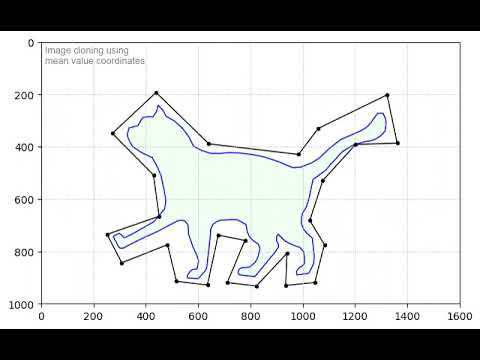

In [ ]:
YouTubeVideo("OnGSuGOJzg0", width=640, height=397)

## Harmonic Coordinates
* To be continued
* All algorithms are available, should be straight forward ...